<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1"><span class="toc-item-num">1</span>Data loading</a></span></li><li><span><a href="#Matrix multiplication" data-toc-modified-id="Matrix multiplication-2"><span class="toc-item-num">2</span>Matrix multiplication</a></span></li><li><span><a href="#Transformation algorithm" data-toc-modified-id="Transformation algorithm-3"><span class="toc-item-num">3</span>Conversion algorithm</a></span></li><li><span><a href="#Verification of the algorithm" data-toc-modified-id="Algorithm-check-4"><span class="toc-item-num">4</span>Checking the algorithm</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Before-conversion:" data-toc-modified-id="Before-conversions:-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Before conversion:</a></span></li><li><span><a href="#After-conversion" data-toc-modified-id="After-conversion-4.0.2"><span class="toc-item-num">4.0.2</span>After conversion</a></span></li></ul></li></ul></li>

# Protection of personal data of bank customers 

With this project we are going to protect the customer data of a insurance company. To achieve our goal we will create a method of data transformation so that it is difficult to recover personal information from them. 

It is necessary to protect the data so that the quality of machine learning models does not deteriorate during the conversion. There is no need to select the best model.

## Loading data

We import the packages necessary for the project implementation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv(r'C:\Users\pinos\Downloads\insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
display(data.dtypes)

Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

First of all, note that the age is specified in floating-point format, whereas the boolean value would be in int. So, we're going to change it to it so that they all stay as int and the earnings as float.

In [5]:
data['Возраст']=data['Возраст'].astype('int64')

In [6]:
display(data.dtypes)

Пол                    int64
Возраст                int64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

Checking for any duplicates.

In [7]:
data.duplicated().sum()

153

In [8]:
data.duplicated().sum()/len(data)*100

3.06

Dealing with 3 percent of the dataset, we're going to throw them away

In [9]:
data = data.drop_duplicates()

In [10]:
data.isna().mean()

Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

As we can see, we don't have any nan.

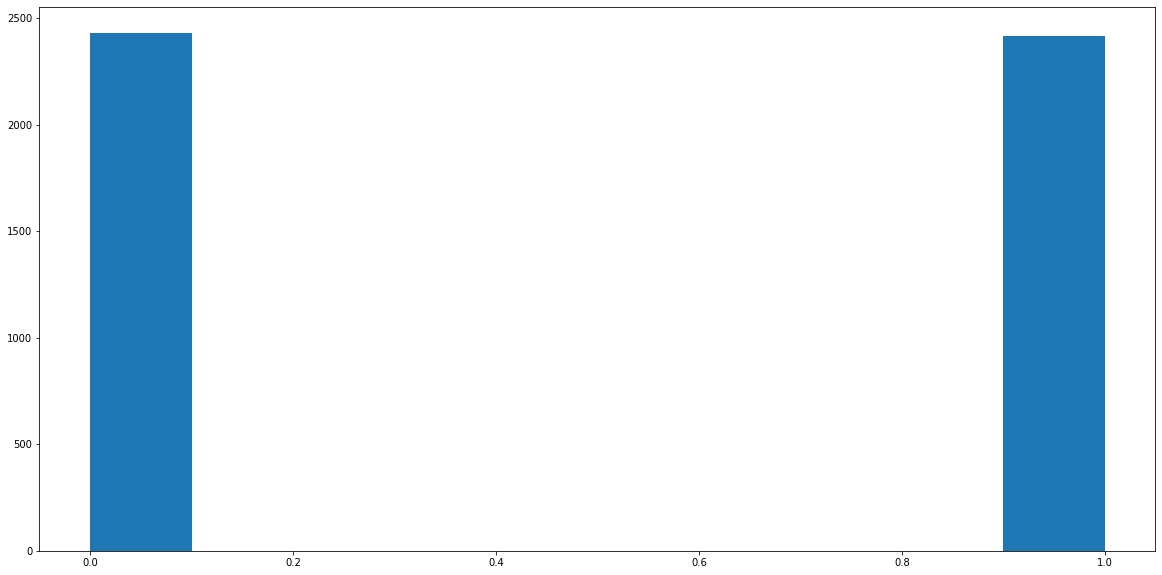

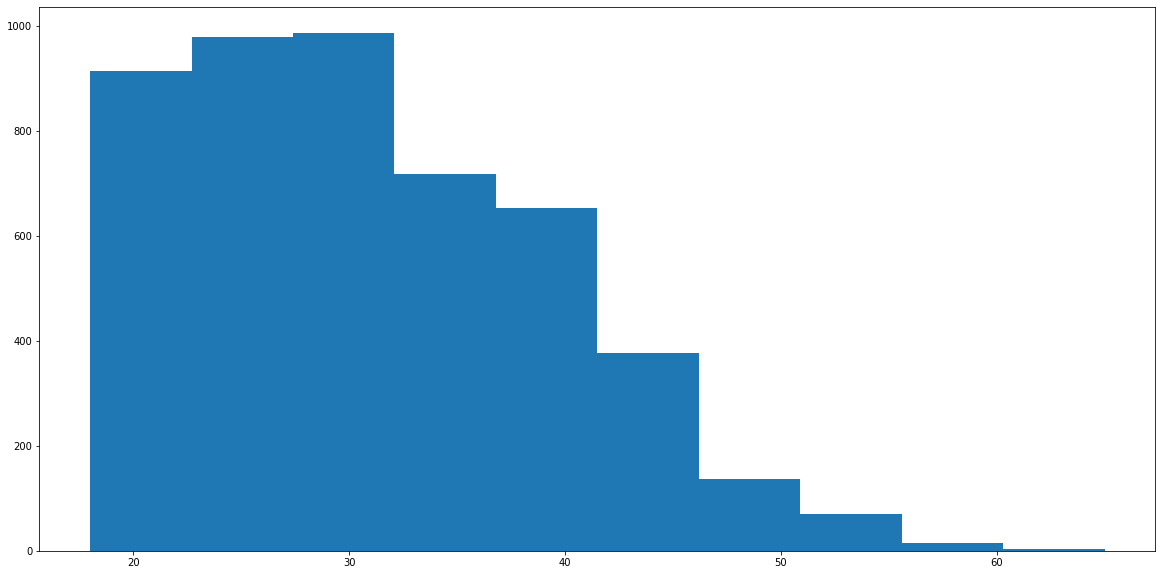

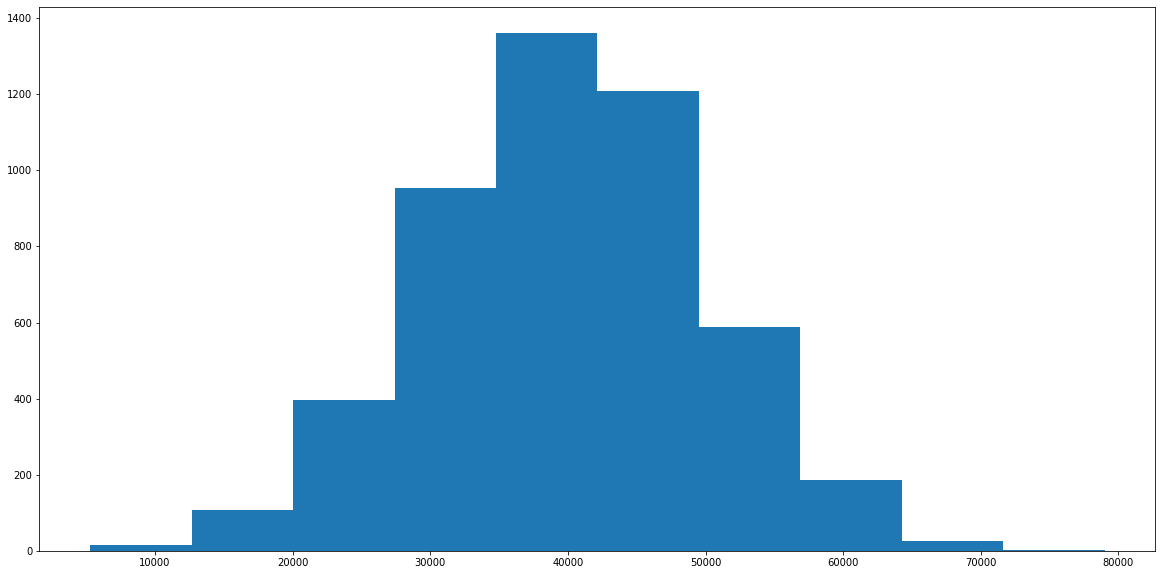

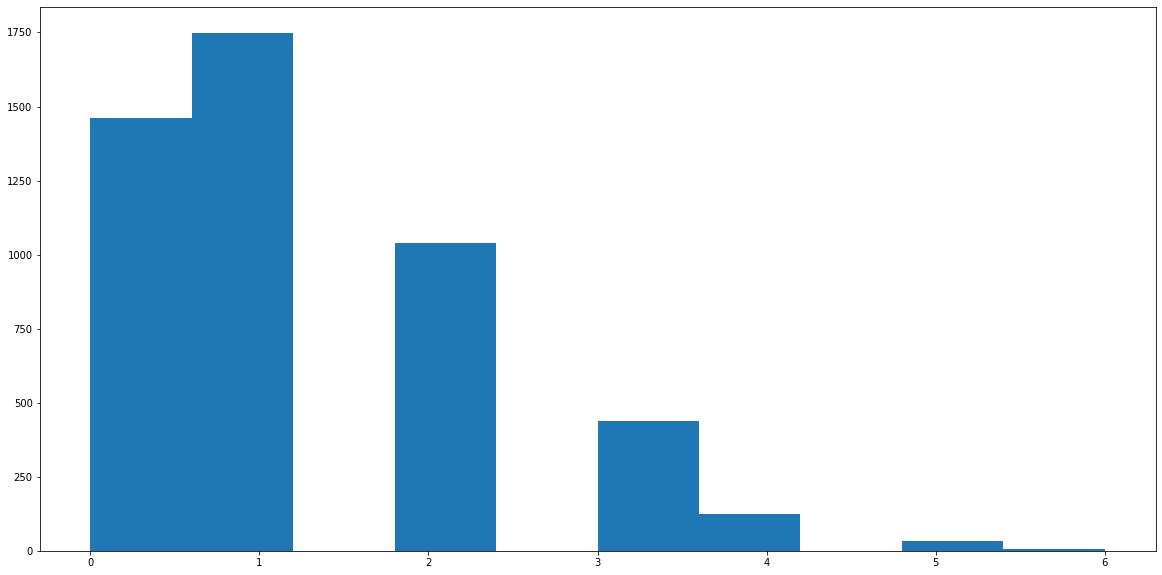

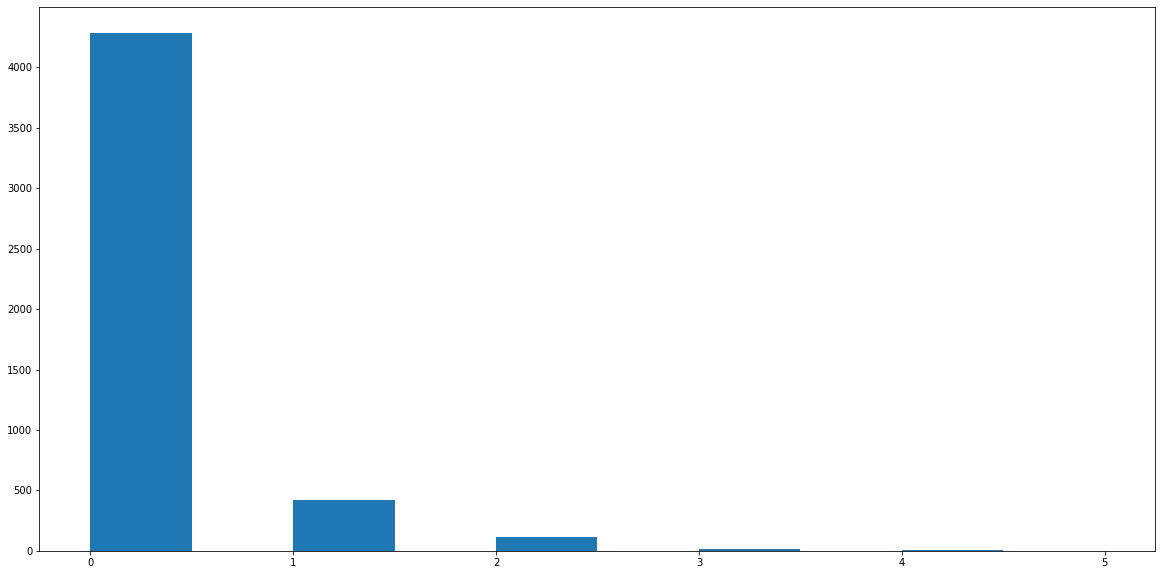

In [11]:
for i in ['Пол','Возраст', 'Зарплата', 'Члены семьи','Страховые выплаты']:
    plt.figure(figsize=(20, 10))
    plt.hist(data[i])
    plt.show()

On the graphs we can see that the floor is very similar in the 1/2 ratio.
The most common age ranges from 18 to 40 years, which leads to a significant decrease compared to this age.
The average income is about 40,000.
The number of members in a family usually ranges from 0 to 2.
We see how the insurance payment which is our goal is encoded in three categories 0, 1 and 2: 0 is the widest.

## Matrix multiplication

Designations:

- $X$ — feature matrix (zero column consists of units)

- $y$ — vector of the target feature

- $P$ — the matrix by which the signs are multiplied

- $w$ — linear regression weight vector (zero element equals shift)

Predictions:

$$
a = Xw
$$

The task of training:

$$
w = \arg\min_w MSE(Xw, y)
$$

Learning formula:

$$
w = (X^T X)^{-1} X^T y
$$

**Response:** Won't change

**Justification:**

In principle, we proceed from the hypothesis that the matrix does not change what would lead to the quality of the regression model we use.
Let 's recall the regression formula:

$$a=Xw+wo$$


Shorten the formula and simply multiply $X$ and $w$:

$$a=Xw$$

Suppose that $A$ is a matrix that can be multiplied by a matrix of features and $B$ assume that it is equal to $X*A$, then $a=Bw$

The minimum value of MSE is obtained when the weights are equal to this value, so we transfer it to our equation:

$$w=(B^{T}B)^{-1}B^{T}y$$
$$a=B(B^{T}B)^{-1}B^{T}y$$

Move $a=B(B^{T}B)^{-1}B^{T}y$ from $B$ to $XA$:

$$a=XA((XA)^{T}(XA))^{-1}(XA)^{T}y$$

Simplifying:

$$a=(X * A) * ((X * A)^{T} * (X * A))^{-1} * (X * A)^{T} * y = 
X * A((X*A)^{T} * (X * A))^{-1} * A^{T} * X^{T} y = 
X * A * (A^{T} * X^{T} * X * A)^{-1}* A^{T} * X^{T} * y$$
    
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
    
</div>

Following this property $(ABC)^{-1} = C^{-1}B^{-1}A^{-1}$, we should $A=A^{T}, B=X^{T}X, C= A$

Then:

$a=X * A * A^{-1} * (X^{T} * X)^{-1} * (A^{T})^{-1} * A^{T} * X^{T} * y$

$a = X[(X^{T} * X)^{-1}X^{T}y$]

And the vector will be equal to:

$w = (X^{T} * X)^{-1}X^{T}y$

We can see that no matter how we multiply the matrix, the result does not change, so the quality of the model is guaranteed.

## Conversion algorithm

**Algorithm**

* We generate a matrix A

* Let's check its reversibility

* Multiply the signals by the matrix A

* Calculate the coefficient R2

**Justification**

As we showed just above, no matter by what value we multiply the matrix, the result remains the same. We need a square matrix, and at the moment our data set consists of the form (5000, 4). The checked matrix that we need to build is (4, 4).

## Checking the algorithm

#### Before conversion:

Executing a section of the dataset.

In [4]:
X = data.drop(['Страховые выплаты'], axis = 1)
y = data['Страховые выплаты']

In [5]:
features_train, features_test, target_train, target_test = train_test_split(
    X, y, test_size = 0.2)

In [6]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
R2_1 = r2_score(target_test, predictions)
print('Model quality before conversion:')
print(R2_1)

Model quality before conversion:
0.3985993524293293


#### After conversion:

In [9]:
def transform(features):
    
    X = features
    n = features.shape[1]
    A = np.random.randint(1, 10, (n,n))
    
    # Let's calculate the determinant of the matrix A
    e = np.linalg.det(A)

    # A square matrix is invertible when its determinant is nonzero
    while e == 0:
        B = np.random.randint(1, 10, (n,n))
        e = np.linalg.e(A)
    
    # We transform the features by multiplying the feature matrix by an invertible matrix A
    B = X @ A
    return B,A

In [8]:
features_transform, B = transform(X)
print(features_transform)
print('-'*40)
print(pd.DataFrame(B))

             0         1        2         3
0     446743.0  297696.0  49737.0  297733.0
1     342377.0  228098.0  38143.0  228140.0
2     189232.0  126058.0  21087.0  126087.0
3     375486.0  250254.0  41773.0  250267.0
4     235130.0  156664.0  26193.0  156692.0
...        ...       ...      ...       ...
4995  321542.0  214268.0  35794.0  214288.0
4996  471881.0  314474.0  52507.0  314504.0
4997  305278.0  203452.0  33970.0  203464.0
4998  294509.0  196270.0  32790.0  196280.0
4999  365639.0  243670.0  40698.0  243694.0

[5000 rows x 4 columns]
----------------------------------------
   0  1  2  3
0  6  8  9  8
1  8  2  3  3
2  9  6  1  6
3  9  6  5  2


We can see that the conversion was successful and the data was encrypted, so there is no way to find out their contents.

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
         features_transform, y, test_size = 0.2)

In [11]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
R2_2 = r2_score(target_test, predictions)

print('The quality of the model after conversion:')
print(R2_2)

The quality of the model after conversion:
0.425603654834685


It can be noted that after the conversion, the quality of the model dropped by 6 percent, although the personal data of customers remains safe.